In [1]:

# import working classes
import pandas as pd
import os
import matplotlib.pyplot as plt # same as: from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4

In [2]:
# os.getcwd()


In [3]:
# os.listdir(os.getcwd()) # - lists all files in cwd

In [4]:
# import data
moviedata = pd.read_csv('MovieGross-Data.csv', engine = 'python')
moviedata.head(2)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4


In [ ]:
# Explore Dataset 

In [19]:

moviedata.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [20]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

In [37]:
# reimport data with only columns of interest
moviedata1 = pd.read_csv('MovieGross-Data.csv', engine = 'python', usecols = ['Genre', 'Studio', 'Gross % US'] )
moviedata1.info() # 608 rows * 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 3 columns):
Genre         608 non-null object
Studio        608 non-null object
Gross % US    608 non-null float64
dtypes: float64(1), object(2)
memory usage: 14.3+ KB


In [41]:
genre_filters = ['action', 'comedy', 'adventure', 'animation', 'drama']  # create dictionaries with specified factors
studio_filters = ['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']

moviedata1 = moviedata1[moviedata1.Studio.isin(studio_filters)]
moviedata1 = moviedata1[moviedata1.Genre.isin(genre_filters)]
moviedata1.tail() # 423 rows * 3 columns

,Genre,Studio,Gross % US
598,adventure,Universal,39.1
600,adventure,Universal,54.9
602,adventure,Fox,49.0
604,action,Fox,59.5
606,drama,Paramount Pictures,30.1


In [121]:
#rename columns

In [42]:
moviedata1.columns

Index(['Genre', 'Studio', 'Gross % US'], dtype='object')

In [43]:
moviedata1.columns = ['Genre1', 'Studio1', 'Gross%US']

In [44]:
# change 2 columns to categorical data types
moviedata1.Genre1 = moviedata1.Genre1.astype('category')
moviedata1.Studio1 = moviedata1.Studio1.astype('category')
moviedata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 3 columns):
Genre1      423 non-null category
Studio1     423 non-null category
Gross%US    423 non-null float64
dtypes: category(2), float64(1)
memory usage: 7.8 KB


 Plot boxplot with strip plot


In [45]:
moviedata1.Genre1.unique() # check Genre factors are as specified

[action, comedy, adventure, animation, drama]
Categories (5, object): [action, comedy, adventure, animation, drama]

In [46]:
moviedata1.Studio1.unique() # check Studio factors are as specified

[Buena Vista Studios, Sony, Universal, WB, Paramount Pictures, Fox]
Categories (6, object): [Buena Vista Studios, Sony, Universal, WB, Paramount Pictures, Fox]

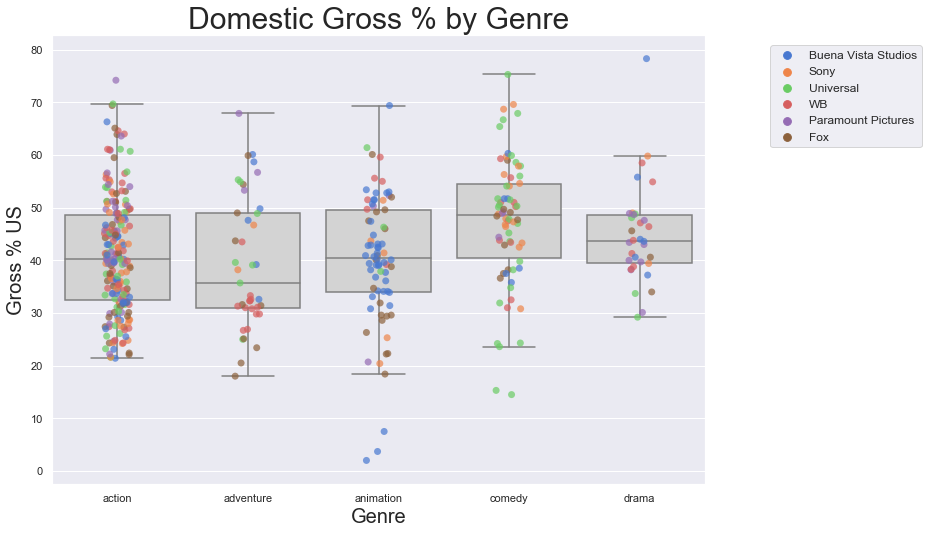

In [48]:

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # set figure size to A4 sheet 
sns.set(style = 'darkgrid', palette="muted", color_codes=True) # set plot parameters

boxcol = { 'Buena Vista Studios' : 'blue', 'Sony' : 'green', 'Universal' : 'red', 'WB' : 'purple', 
          'Paramount Pictures' : 'brown', 'Fox': 'lightblue' } #NB: need to fix legend colors to match

# Plot boxplot
b1 = sns.boxplot(data = moviedata1, x = moviedata1.Genre1, y = 'Gross%US', fliersize = 0, color = 'lightgray' )

# Plot strip plot
sns.stripplot(data = moviedata1, x = moviedata1.Genre1, y = 'Gross%US', hue = 'Studio1', 
               hue_order = ['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'], 
               palette = None, alpha = .7, size = 7)

plt.title('Domestic Gross % by Genre', fontsize = 30) # can add thematics by plt
plt.xlabel('Genre', fontsize = 20)
b1.set_ylabel('Gross % US', fontsize = 20) # can add thematics by treating b1 as an object
plt.legend(title = None, loc = (1.1, .75), prop = {'size': 12} )
plt.show()